# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [43]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [44]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [45]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        loss = np.mean((X@w - y) ** 2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2*(X.T)@(X@w - y)/len(y)
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [46]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [47]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    points = [w_init.copy()]
    for i in range(n_iterations):
      w_init = w_init - lr*loss.calc_grad(X, y, w_init)
      points.append(w_init.copy())
    return points

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [48]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [49]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [50]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, title: str):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title(f"GD trajectory{title}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

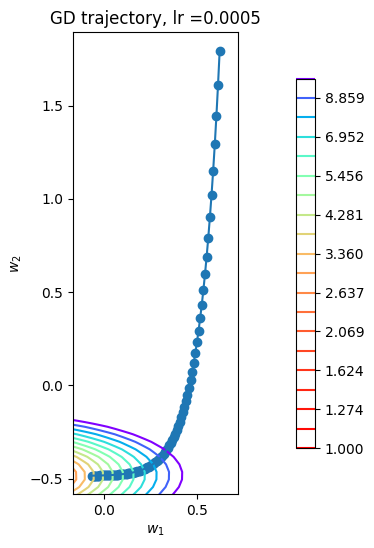

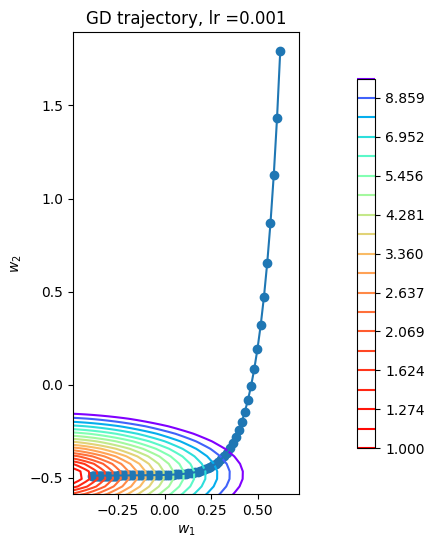

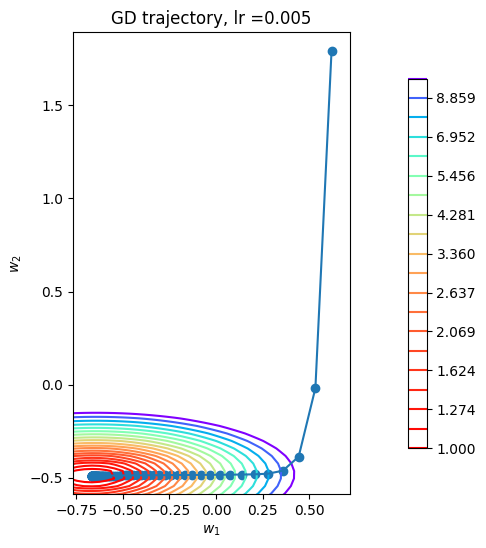

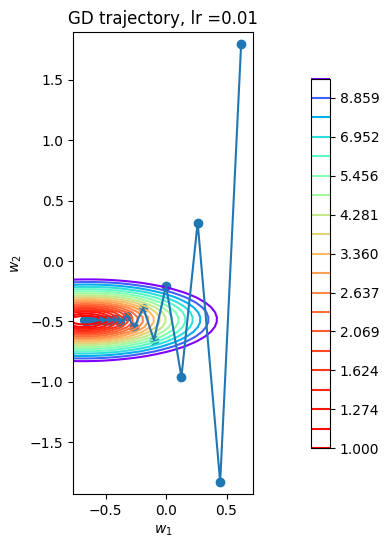

In [51]:
lr_list= [0.0005, 0.001, 0.005, 0.01]
for lr in lr_list:
  plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss, f', lr ={lr}')

**Вывод:** Если параметр lr принимает маленькое значение, то это может привести к медленной сходимости алгоритма, и тогда для достижения оптимального значения функции потерь будет требоваться большое количество итераций, иначе градиентный спуск остановится не дойдя до цели. Если же значение lr слишком велико, есть риск, что модель "проскочит" через минимум функции потерь, так как траектория градиентного спуска будет сильнее колебаться при большом lr.

На первых двух графиках видно, что градиент не смог достичь минимума из-за маленькой длины шага lr, но траектории спуска хорошо сглажены. На последнем графике можно наблюдать, что траектория градиентного спуска стала колебаться сильнее из-за большего значения lr.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [52]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    points = [w_init.copy()]
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w_init = w_init - lr*loss.calc_grad(X[batch_indices], y[batch_indices], w_init)
      points.append(w_init.copy())
    return points

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

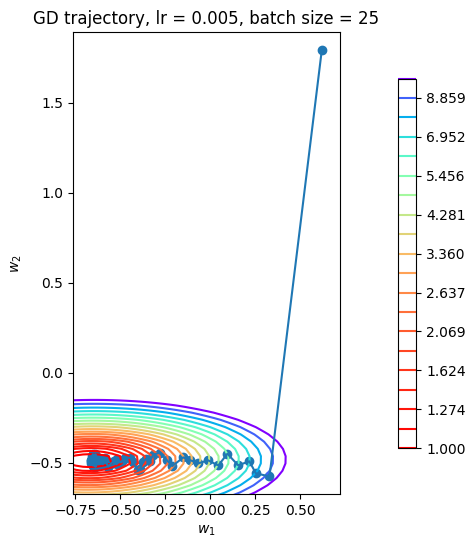

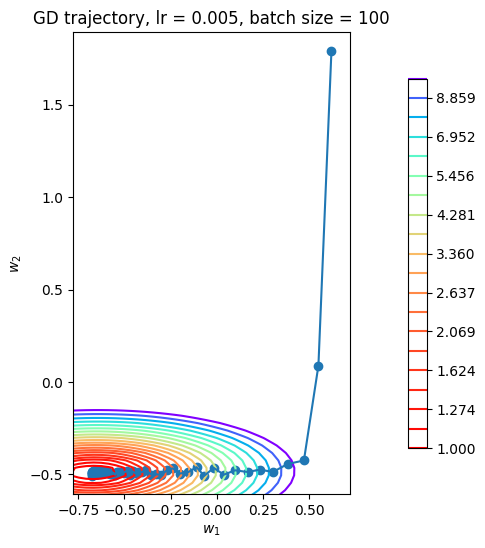

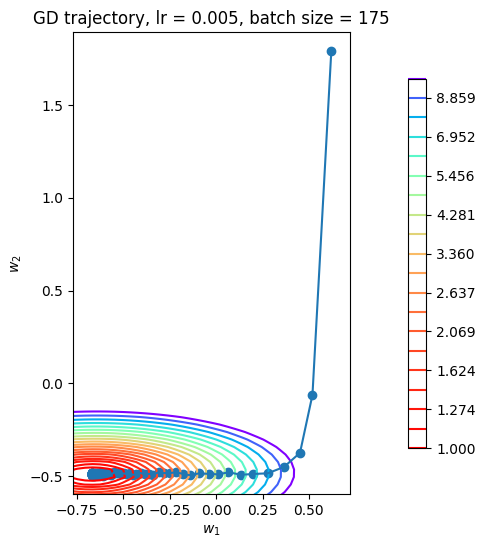

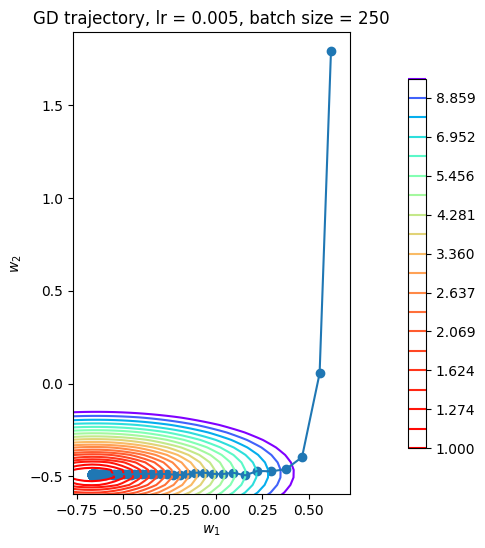

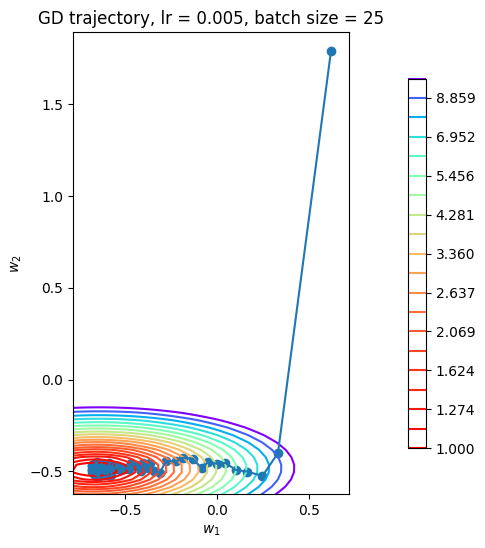

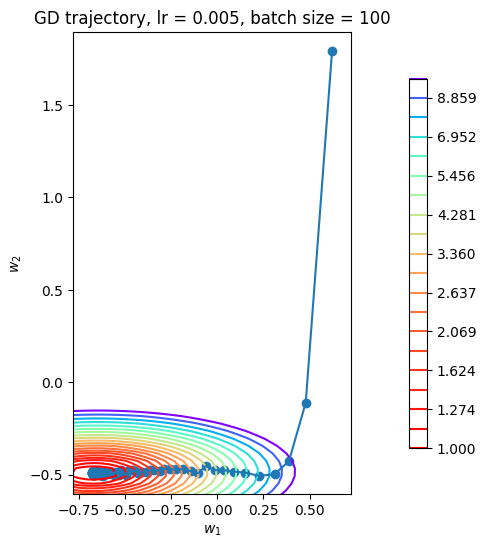

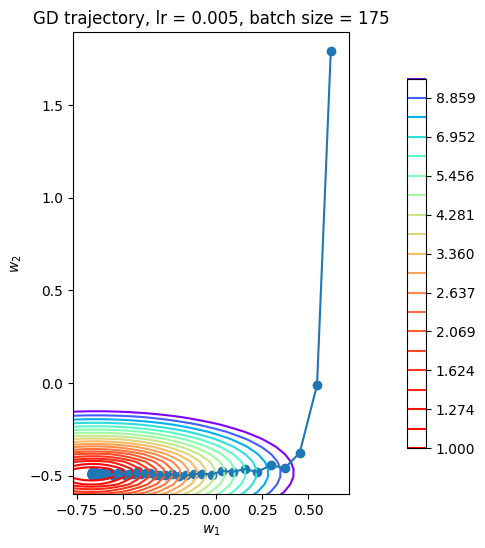

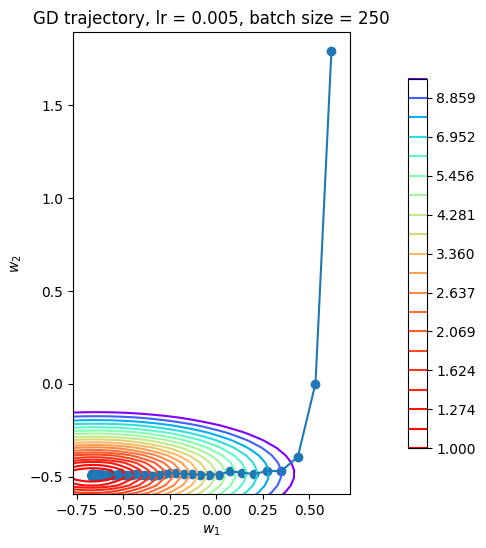

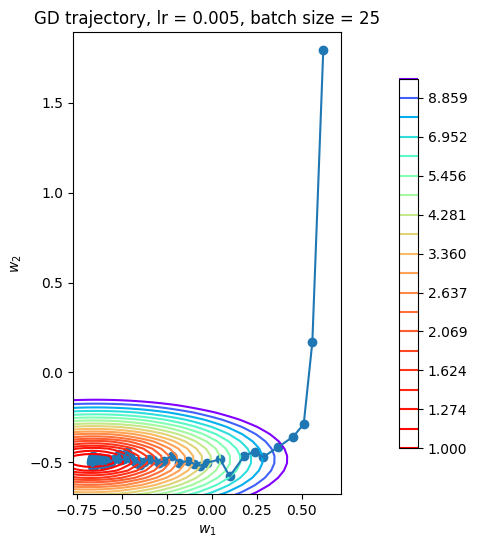

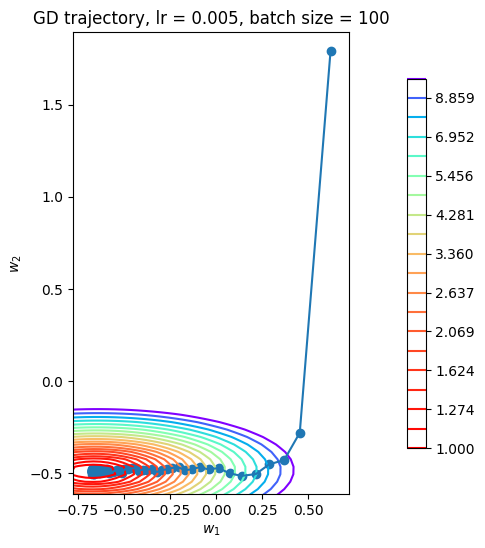

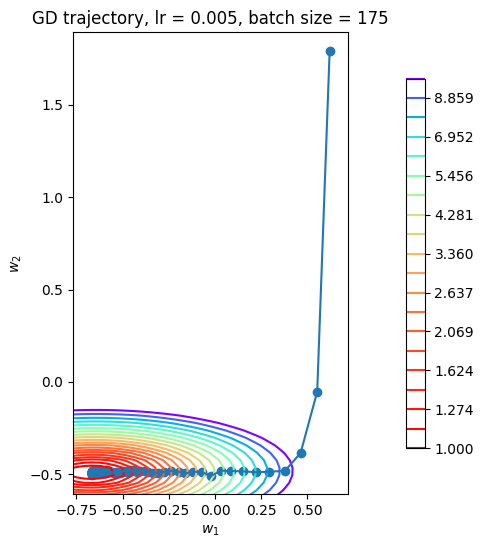

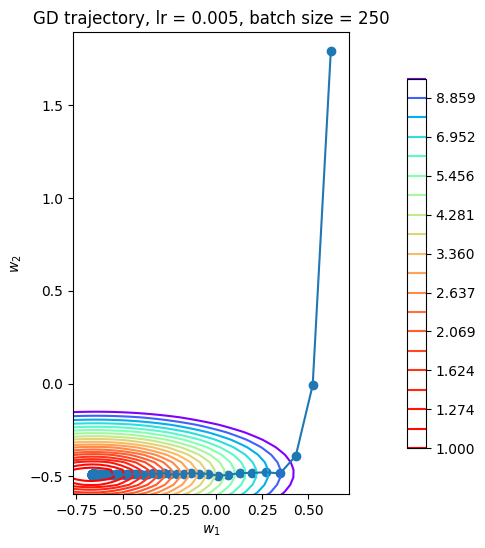

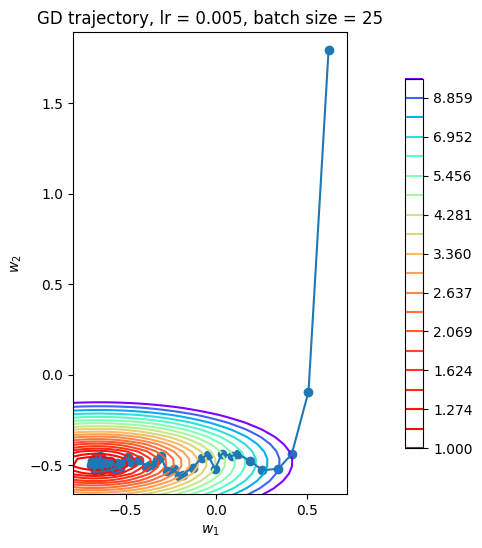

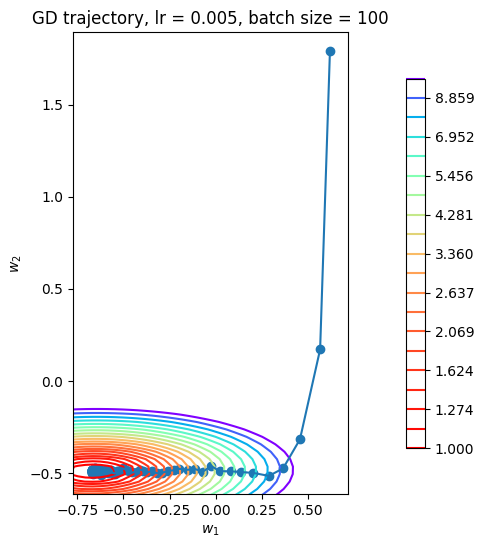

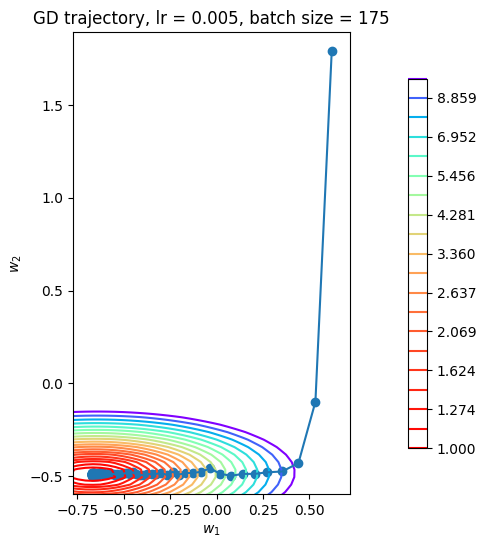

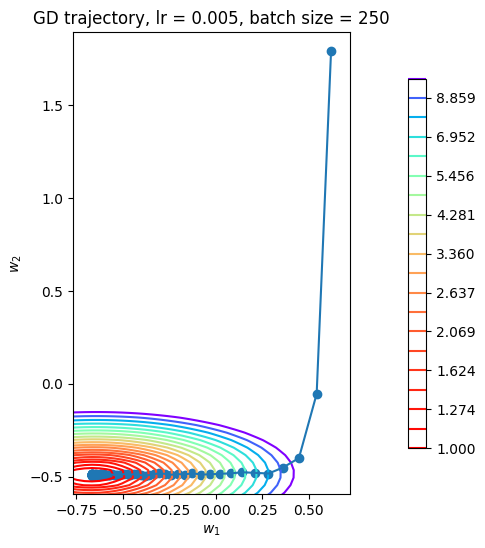

In [54]:
lr_list= [0.0005, 0.001, 0.005, 0.01]
batch_list = [25, 100, 175, 250]
for lr in lr_list:
  for batch_size in batch_list:
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100), X, y, loss, f', lr = {lr}, batch size = {batch_size}')



**Вывод:** На графиках видно, что длина шага lr влияет на поведение стохастического градиентного спуска также, как и на обычный: при маленьких значениях lr траектория более сглаженная, при больших значениях - наблюдется больше колебаний. При маленьких значениях параметра batch_size траектория становится более хаотичной, так как для вычисления градиента используется меньшая выборка, которая после каждого шага меняется. При больших значениях batch_size траектория становится более гладкой и похожей на траекторию обычного градиентного спуска.

Стохастический градиентный спуск отличается от обычного тем, что он данных вместо всех данных использует только часть из них (случайную выборку) для вычисления градиента на каждом шаге. При больших массивах данных стохастический градиентный спуск может дать значительное преимущество в скорости обучения по сравнению со стандартным градиентным спуском, однако есть риск получить менее точные результаты, если выборка недостаточно репрезентативна.



Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [55]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    points = [w_init.copy()]
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w_init = w_init - (lr * (1/(1+i))**p)*loss.calc_grad(X[batch_indices], y[batch_indices], w_init)
      points.append(w_init.copy())
    return points

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

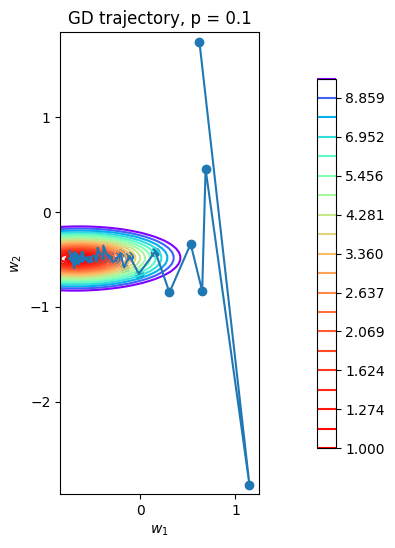

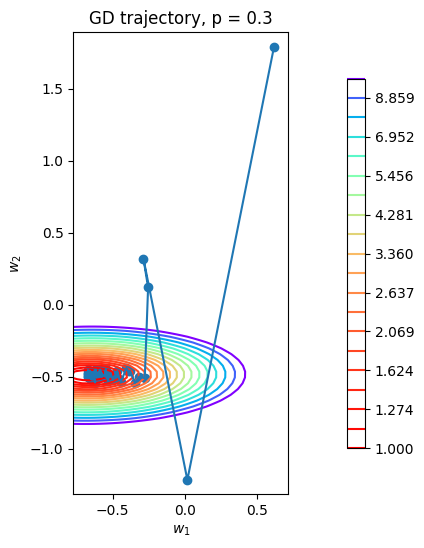

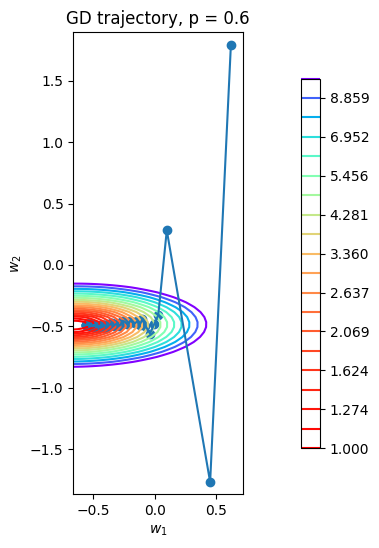

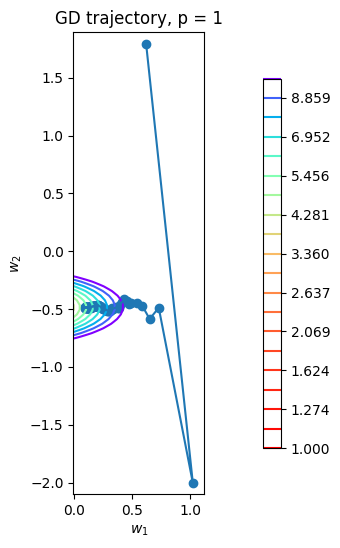

In [58]:
lr = 0.01
batch_size = 10
p_list = [0.1, 0.3, 0.6, 1]
for p in p_list:
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 100), X, y, loss, f', p = {p}')

**Вывод:** На графиках видно, что чем больше становится параметр p, тем быстрее уменьшается шаг стохастического градиентного спуска и график становится более сглаженным, наблюдается меньше колебаний. Но на последнем графике видно, что градиентный спуск не дошел до минимума, из чего можно сделать вывод, что при большом значении параметра p и маленьком количестве итераций, увеличивается риск того, что оптимум не будет достигнут.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

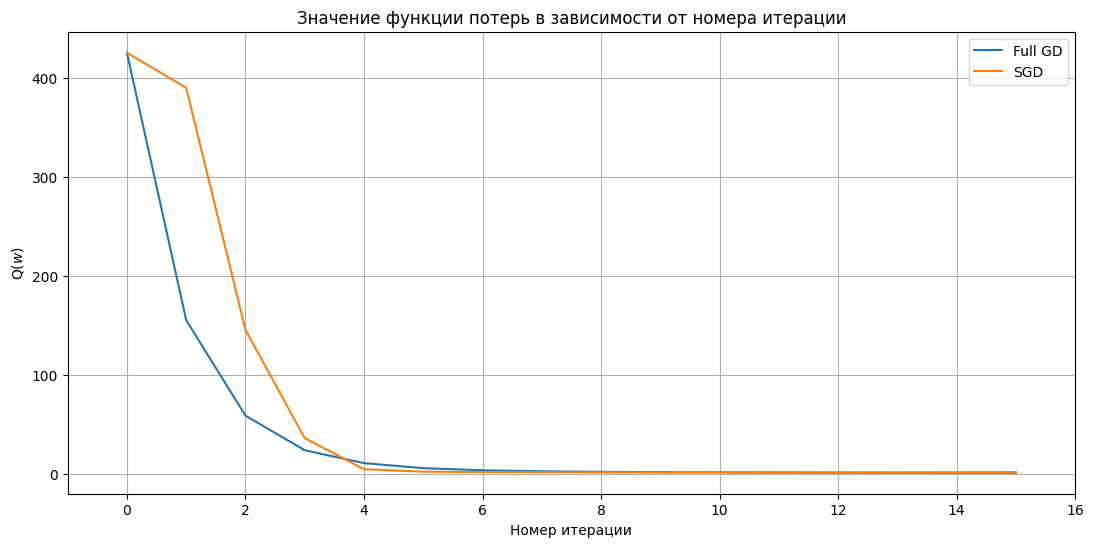

In [110]:
lr = 0.01
batch_size = 10
num_steps = 15

w_gd = w_init
w_sgd = w_gd.copy()

loss_gd = [loss.calc_loss(X, y, w_gd)]
loss_sgd = [loss.calc_loss(X, y, w_sgd)]

for i in range(num_steps):
  w_gd = w_gd - lr*loss.calc_grad(X, y, w_gd)
  loss_gd.append(loss.calc_loss(X, y, w_gd))

  batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
  w_sgd = w_sgd - lr*loss.calc_grad(X[batch_indices], y[batch_indices], w_sgd)
  loss_sgd.append(loss.calc_loss(X, y, w_sgd))

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps + 1), loss_gd, label="Full GD")
plt.plot(range(num_steps + 1), loss_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()

**Вывод:** На графике видно, что вначале, при небольшом количестве итераций, значение ошибки при SGD больше, но спустя несколько шагов ошибка стремительно убывает, сравнивается с обычным GD и сходится к нулю. Но несмотря на то, что вначале у SGD ошибка больше, взамен этого мы получаем преимущество в скорости обучения при больших массивах данных.



## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [111]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        self.w = np.zeros(X.shape[1])
        w_list = gradient_descent(self.w, X, y, self.loss, self.lr, 100)
        self.w = w_list[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X@(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [112]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [113]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [114]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [115]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [116]:
# создадим маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_real.columns = X_real.columns.astype(str)
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_real), columns=X_real.columns
)

# для категориальных заполним пропуски пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")

# нормализуем числовые признаки
normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_no_mis_real)
X_real_norm_np_df = pd.DataFrame(data=X_real_norm_np)
X_all = pd.concat([X_real_norm_np_df, X_cat], axis=1)
X = pd.DataFrame(data=X_all)

# закодируем категориальные переменные
X_dum = pd.get_dummies(X, drop_first=True)

# разделим датасет на обучающую и тестовую выборку
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3, shuffle = True)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [117]:
linear_regression.fit(X_train, y_train) # обучаем модель на train

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [138]:
from sklearn.metrics import mean_squared_error

y_train_pred = linear_regression.predict(X_train) # применяем модель на train
y_test_pred = linear_regression.predict(X_test) # применяем модель на test

mse_train_1 = mean_squared_error(y_train, y_train_pred) # вычисляем MSE на train
mse_test_1 = mean_squared_error(y_test, y_test_pred) # вычисляем MSE на test

print('MSE на train:', mse_train_1)
print('MSE на test:', mse_test_1)

MSE на train: 3277298.8393132826
MSE на test: 10899796.891219202


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [119]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        loss = np.mean((X@w - y) ** 2) + self.coef * np.sum(w[:-1] ** 2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2*(X.T)@(X@w - y)/len(y)
        grad[:-1] = grad[:-1] + 2*self.coef*w[:-1]
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [120]:
linear_regression_L2 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [121]:
best_lambda = {}
for i in np.arange(0.001, 1, 0.005):
  linear_regression_L2 = LinearRegression(MSEL2Loss(i))
  linear_regression_L2.fit(X_train, y_train) # обучаем модель на train

  y_test_pred = linear_regression_L2.predict(X_test) # применяем модель на test

  mse_test = mean_squared_error(y_test, y_test_pred) # вычисляем MSE на test

  best_lambda[i] = mse_test

# находим наилучшее значение lambda (при котором минимальный MSE)
min_value = min(best_lambda.values())
for key, value in best_lambda.items():
    if value == min_value:
        best_lambda_value = key

linear_regression_L2 = LinearRegression(MSEL2Loss(best_lambda_value)) # используем наилучшее значение lambda
linear_regression_L2.fit(X_train, y_train) # обучаем модель на train
y_train_pred = linear_regression_L2.predict(X_train) # применяем модель на train
y_test_pred = linear_regression_L2.predict(X_test) # применяем модель на test
mse_train = mean_squared_error(y_train, y_train_pred) # вычисляем MSE на train
mse_test = mean_squared_error(y_test, y_test_pred) # вычисляем MSE на test
print('Наилучшее значение lambda', best_lambda_value)
print('MSE на train:', mse_train)
print('MSE на test:', mse_test)

Наилучшее значение lambda 0.021
MSE на train: 3575385.8951781443
MSE на test: 10717583.864245119


**Вывод:** Как можно заметить, при найденном оптимальном значении lambda ошибка на тестовой выборке сократилась, значит регуляризация оказалась эффективной. На тренировочной выборке ошибка, наоборот, увеличилась.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [122]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X@w - y
        mask = (z < self.eps) & (z > -self.eps) # создаем маску, чтобы отделять два возможных выражения кусочно-заданной функции
        # воссоздаем функцию ϕ
        result = np.zeros_like(y)
        result[mask] = 0.5 * z[mask]**2
        result[~mask] = self.eps*(np.abs(z[mask]) - 0.5*self.eps)
        loss = np.mean(result)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X@w - y
        mask = (z < self.eps) & (z > -self.eps) # создаем маску, чтобы отделять два возможных выражения кусочно-заданной функции
        # воссоздаем градиент функции ϕ
        result = np.zeros_like(y)
        result[mask] = z[mask]
        result[~mask] = self.eps*np.sign(z[~mask])
        grad = (X.T)@result / len(y)
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [123]:
linear_regression_huber = LinearRegression(HuberLoss(eps = 26300))

linear_regression_huber.fit(X_train, y_train) # обучаем модель на train

y_train_pred = linear_regression_huber.predict(X_train) # применяем модель на train
y_test_pred = linear_regression_huber.predict(X_test) # применяем модель на test

mse_train = mean_squared_error(y_train, y_train_pred) # вычисляем MSE на train
mse_test = mean_squared_error(y_test, y_test_pred) # вычисляем MSE на test

print('MSE на train:', mse_train)
print('MSE на test:', mse_test)

MSE на train: 4207468.4114293195
MSE на test: 10764898.65844269


**Вывод:** Как можно заметить, ситуация аналогична использованию L2 регуляризации: MSE на тренировочной выборке увеличилось, а на тестовой выборке - снизилось, что можно считать успехом. Но можно предположить, что в датасете влияние выбросов было небольшим, поэтому MSE сократился не сильно.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

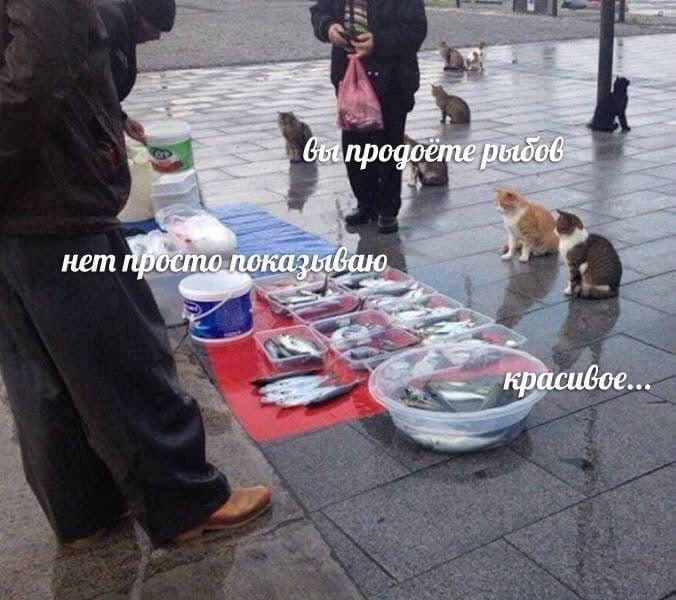

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [127]:
def mse_loss(X, y, w):
  loss = np.mean((X@w - y) ** 2)
  return loss

def alg(init_w, X, y, n_iterations):
  list_MSE = []
  old_w = init_w
  best_w = init_w
  old_loss = mse_loss(X, y, best_w)
  list_MSE.append(old_loss)
  for i in range(n_iterations):

    # генерация нового набора весов
    new_w = old_w + np.random.standard_t(3, size=old_w.shape)
    new_loss = mse_loss(X, y, new_w)

    # сохраняем только те веса, которые снижают значение функции потерь.
    if new_loss < old_loss:
      old_w = new_w

    # проверка на снижение значения функции потерь и вероятностное принятие нового набора весов
    if new_loss < old_loss or np.random.rand() < np.exp((old_loss - new_loss)):
      old_loss = new_loss
      best_w = new_w
    list_MSE.append(old_loss)

  return best_w, list_MSE

In [142]:
n_iterations = 100000
init_w = np.zeros(X_dum.shape[1])
result, list_MSE = alg(init_w, X_train, y_train, n_iterations) # обучаем модель на train

mse_train = mse_loss(X_train, y_train, result) # вычисляем MSE на train
mse_test = mse_loss(X_test, y_test, result) # вычисляем MSE на train

print('MSE на train:', mse_train)
print('MSE на test:', mse_test)

MSE на train: 1642863.7318025618
MSE на test: 7470004.124236272


In [143]:
print('MSE на train при градиентном спуске:', mse_train_1)
print('MSE на test при градиентном спуске:', mse_test_1)

MSE на train при градиентном спуске: 3277298.8393132826
MSE на test при градиентном спуске: 10899796.891219202


**Вывод:** по полученным результатам видно, что алгоритм имитации отжига выдает значения MSE меньше, чем при градиентном спуске, как на тренировочной, так и на тестовой выборке, но для получения таких хороших результатов для алгоритма имитации отжига необходимо огромное количество итераций (в данном случае 100 тысяч)

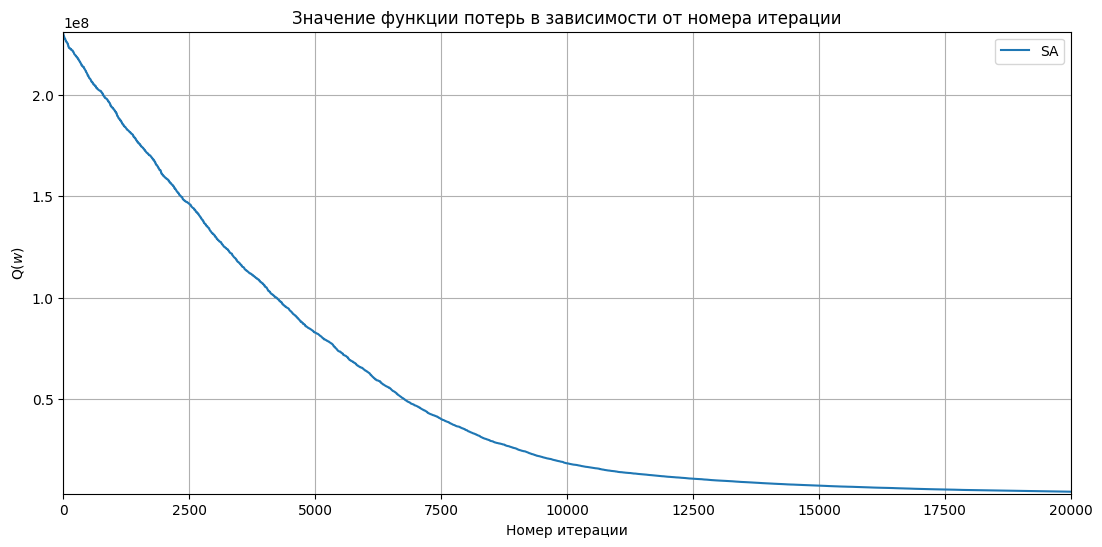

In [141]:
plt.figure(figsize=(13, 6))
plt.plot(range(len(list_MSE)), list_MSE, label="SA")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, n_iterations + 1))
plt.ylim((min(list_MSE)-1000000, max(list_MSE)+1000000))
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()

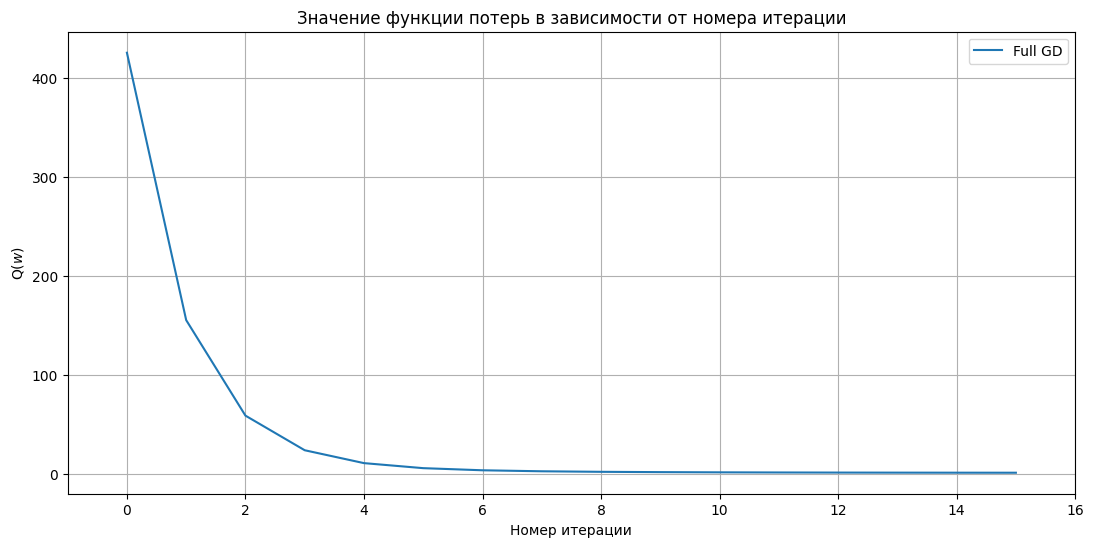

In [232]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps + 1), loss_gd, label="Full GD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()

**Вывод:** По графикам видно, что при градиентном спуске значение ошибки снижается стремительно, и уже после 10 итераций стремится к нулю. В алгоритме имитации отжига значение ошибки снижается очень медленно, но равномерно, и для снижения ошибки до нуля потребуется очень много итераций.